# Learning ML - finding groups in datasets 

### Trying to group the transactions using unsupervised learning (Univariate)
- amount_debited as a single variable
- for single variable [clustering is not sensible]('https://stackoverflow.com/questions/18364026/clustering-values-by-their-proximity-in-python-machine-learning/18385795#18385795') as it is designed for multi-variate problems but to understand the concepts we can use it anyway.
- a way around for using an array with kmeans, turning it into a matrix 
- in 1.1 we predict the cluster of a new data point 
- next in exercise #2 transaction data first binning data points in amount variable using simple histogram. not very effective but outliers are there
- then learning *discretization* and trying to use KBinsDiscretizer. k means strategy works pretty well and label attached df has output shown for popular and outlier labels
- using pd.cut to manually bin data in specified bins and [labels]('https://cmdlinetips.com/2019/12/how-to-discretize-bin-a-variable-in-python/')



In [103]:
import numpy as np
import pandas as pd

#1 matrix for a 1D array
y = [1.0,1,5,6,1,5,10,22,23,23,50,51,51,52,100,112,130,500,512,600,12000,12230]
x = range(len(y))
m = np.matrix([x, y]).transpose()
y=[k*1.0 for k in y]


<Axes: >

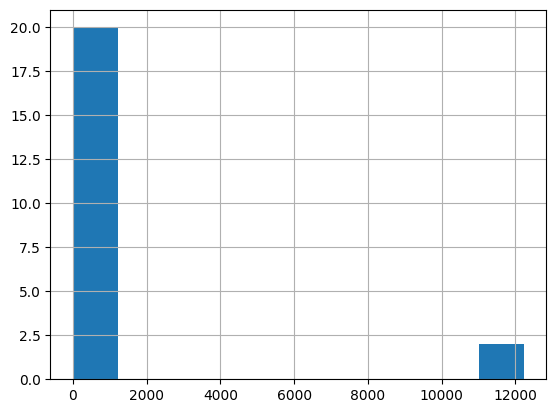

In [140]:
pd.Series(y).hist()

In [131]:
from scipy.cluster.vq import kmeans
kclust,label = kmeans(m, 5)
kclust
# label

array([[6.50000000e+00, 2.15000000e+01],
       [2.00000000e+01, 1.20000000e+04],
       [2.10000000e+01, 1.22300000e+04],
       [1.50000000e+01, 1.14000000e+02],
       [1.80000000e+01, 5.37333333e+02]])

In [133]:
#1.1
cluster_indices = kclust[:, 0]

In [143]:
x=[2121.9,4,300]

In [144]:
assigned_clusters = [abs(cluster_indices - e).argmin() for e in x] #what is the rationale behind this and alternatives.
assigned_clusters

[2, 0, 2]

In [6]:
#2 clustering/bucketing transactions on amount
df = pd.read_csv("transactions_02_202305211610.csv")

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   txn_id                 100 non-null    int64  
 1   msgId                  100 non-null    object 
 2   msgEpochTime           100 non-null    int64  
 3   date                   100 non-null    object 
 4   to_vpa                 100 non-null    object 
 5   amount_debited         100 non-null    float64
 6   additional_category_1  38 non-null     object 
 7   additional_category_2  1 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [12]:
from matplotlib import pyplot

In [13]:
data = df['amount_debited']

(array([72., 17.,  5.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.]),
 array([2.00000000e+00, 6.38327273e+02, 1.27465455e+03, 1.91098182e+03,
        2.54730909e+03, 3.18363636e+03, 3.81996364e+03, 4.45629091e+03,
        5.09261818e+03, 5.72894545e+03, 6.36527273e+03, 7.00160000e+03,
        7.63792727e+03, 8.27425455e+03, 8.91058182e+03, 9.54690909e+03,
        1.01832364e+04, 1.08195636e+04, 1.14558909e+04, 1.20922182e+04,
        1.27285455e+04, 1.33648727e+04, 1.40012000e+04, 1.46375273e+04,
        1.52738545e+04, 1.59101818e+04, 1.65465091e+04, 1.71828364e+04,
        1.78191636e+04, 1.84554909e+04, 1.90918182e+04, 1.97281455e+04,
        2.03644727e+04, 2.10008000e+04, 2.16371273e+04, 2.22734545e+04,
        2.29097818e+04, 2.35461091e

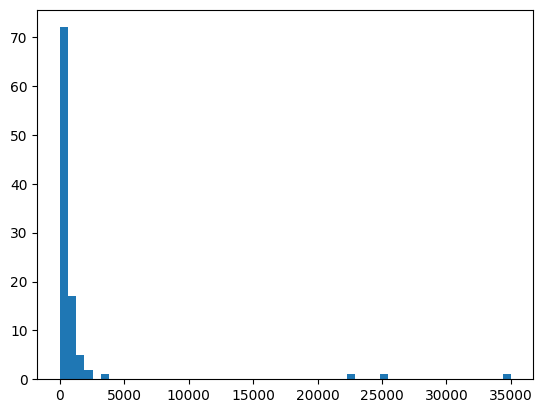

In [17]:
pyplot.hist(data, bins=55)

In [19]:
#3 Binning using Discretizer
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
dnp = np.array(data)
dnp

In [23]:
data = dnp.reshape((len(dnp),1))

In [53]:
kbins = KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='kmeans')
# kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
# kbins = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(data)

In [63]:
x = [k[0] for k in data_trans]
pd.Series(x)


In [67]:
df['label']=x

<Axes: >

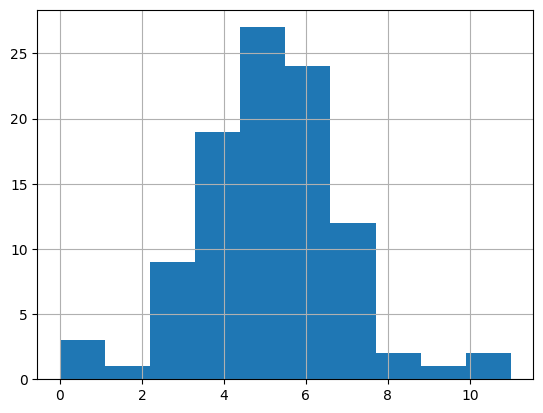

In [84]:
df['label'].hist()

In [85]:
df_5 = df[df['label']==5]
df_4= df[df['label']==4]
df_6 = df[df['label']==6]



In [113]:
df_0 = df[df['label']==0]
df_1 = df[df['label']==1]
df_2 = df[df['label']==2]
df_3 = df[df['label']==3]

In [115]:
df_4[['date','to_vpa','amount_debited','label']]

,date,to_vpa,amount_debited,label
4,2023-05-02,paytmqr2810050501013c01yr8ulryn@paytm,90.0,4.0
5,2023-05-02,7204813514@ybl,96.0,4.0
8,2023-04-30,swiggyupi@axisbank,195.0,4.0
13,2023-04-28,filipskar,200.0,4.0
18,2023-04-25,paytmqr2810050501013c01yr8ulryn@paytm,90.0,4.0
25,2023-04-22,paytmqr2810050501010zuz0zfma5j7@paytm,100.0,4.0
26,2023-04-20,airtel@axb,148.0,4.0
40,2023-04-12,bharatpe907720064799@yesbankltd,100.0,4.0
53,2023-04-07,paytmqr2810050501011m562bblwqd6@paytm,90.0,4.0
56,2023-04-06,paytmqr281005050101yqgyn52g3thd@paytm,110.0,4.0


In [86]:
# df_5[['date','to_vpa','amount_debited','label']]
df_6[['date','to_vpa','amount_debited','label']]

,date,to_vpa,amount_debited,label
1,2023-05-06,swiggyinstamart@yespay,506.0,6.0
3,2023-05-02,7005754061@ibl,727.0,6.0
6,2023-05-01,swiggyinstamart@yespay,680.0,6.0
9,2023-04-30,lam,882.0,6.0
11,2023-04-29,airtel.payu@axisbank,588.0,6.0
23,2023-04-22,q008195442@ybl,740.0,6.0
27,2023-04-20,swiggyinstamart@yespay,577.0,6.0
30,2023-04-18,swiggyupi@axisbank,552.0,6.0
31,2023-04-17,7005754061@ibl,706.0,6.0
37,2023-04-15,swiggyinstamart@yespay,485.0,6.0


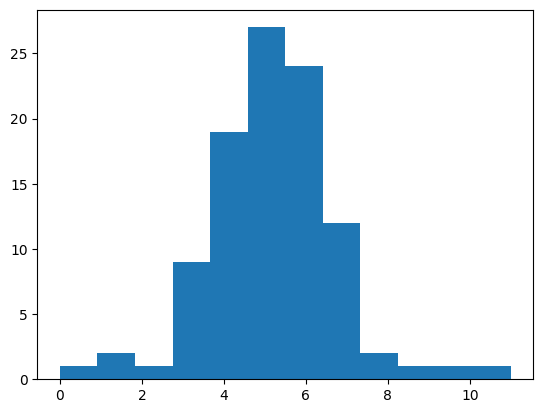

In [54]:
pyplot.hist(data_trans, bins=12)
pyplot.show()


In [123]:
df_11 = df[df['label']==11]
df_10 = df[df['label']==10]
df_9 = df[df['label']==9]
# df_3 = df[df['label']==3]

In [124]:
df_9[['date','to_vpa','amount_debited','label']]

,date,to_vpa,amount_debited,label
66,2023-04-02,credclub@icici,22741.0,9.0


In [163]:
#5 MeanShift
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

x = [1,1,5,6,1,5,10,22,23,23,50,51,51,52,100,112,130,500,512,600,12000,12230] #use own amount_debited

X_s = np.array(list(zip(x,np.zeros(len(x))))) #what is np.zeroes
bandwidth = estimate_bandwidth(X_s, quantile=0.1) #what is this
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True) #what is mean shift
ms.fit(X_s) #how does fit method works
labels = ms.labels_
cluster_centers = ms.cluster_centers_ #what is "cluster center" and how to use it

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

for k in range(0,n_clusters_):
    my_members = labels == k
    # print(my_members)
    print("cluster {}: {}".format(k, X_s[my_members, 0]))

#Modifying quantilevariable you can change the clustering number selection criteria

cluster 0: [ 1.  1.  5.  6.  1.  5. 10. 22. 23. 23.]
cluster 1: [50. 51. 51. 52.]
cluster 2: [100. 112. 130.]
cluster 3: [500. 512.]
cluster 4: [12230.]
cluster 5: [12000.]
cluster 6: [600.]


<Axes: >

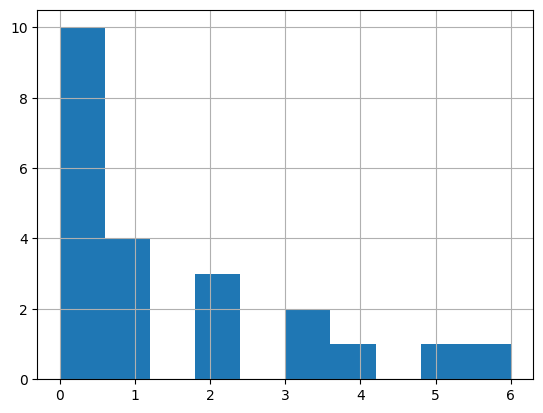

In [161]:
pd.Series(labels).hist()

In [ ]:
#6 zabardasti clustering individual serieses a dataframe
from sklearn.cluster import KMeans
import pandas as pd
data = {'one': ([1., 2., 3., 4., 3., 2., 1.]), 'two': [4., 3., 2.,1., 2., 3., 4.13]}
data = pd.DataFrame(data)
n_clusters=3
for col in data.columns:
    kmeans=KMeans(n_clusters=n_clusters)
    x = np.array(data[col].to_list()).reshape(-1, 1)
    kmeans.fit(x)
    print("{}:{}".format(col,kmeans.predict(x)))

## Conclusions
- [this]('https://stats.stackexchange.com/questions/30361/univariate-clustering-of-time-series') question has an answer which describes some overall concepts of anomaly detection. bit theoretical and language is hard but lot of content.
- Popular methods for univariate clustering is actually not clustering but binning and density mapping like [KDE]('https://stackoverflow.com/questions/35094454/how-would-one-use-kernel-density-estimation-as-a-1d-clustering-method-in-scikit/35151947#35151947')
- learn about k [nearest neighbours]('https://scikit-learn.org/stable/modules/neighbors.html#neighbors') for understanding this further
- Another popular version is [jenks natural breaks]('https://en.wikipedia.org/wiki/Jenks_natural_breaks_optimization') which [can be implemented]('https://pbpython.com/natural-breaks.html') using the jenkspy package. try it.related topic on 
- [change detection]('https://en.wikipedia.org/wiki/Change_detection') in mean is detected in this kind of technique. However when data is timeseries a more appropriate technique can be to detect change in timeseries, 
- [timeseries clustering & why it is special]('https://towardsdatascience.com/hands-on-climate-time-series-clustering-using-machine-learning-with-python-6a12ce1607f9'). Important to move on to do univariate timeseries anomaly detection.
- [Great website for ML]('https://machinelearningmastery.com/clustering-algorithms-with-python/')
- Ex1: instead of amount debited take hour as a variable 

In [ ]:
import jenkspy
url= "https://raw.githubusercontent.com/hellojosh/AwesomeData/master/national-parks.csv"
d = pd.read_csv(url)
location_counts = d[ "location"].value_counts()
# Calculate Break
_, b,_ = jenkspy.jenks_breaks(location_counts,n_classes =2)
print (f"BREAK: {b}")
pd.concat([location_counts, (location_counts == 2).rename("included")], axis=1)